In [2]:
#  Uninstall conflicting versions
!pip uninstall -y numpy pmdarima

# Reinstall compatible versions
!pip install numpy==1.24.4
!pip install pmdarima==2.0.3


Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.3 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompa

  Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (1.9 MB)


In [1]:
import pmdarima
from pmdarima import auto_arima
print("pmdarima version:", pmdarima.__version__)

pmdarima version: 2.0.3


In [2]:

# ================================
# 1. Import necessary libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# auto_arima for automatic (p, d, q) selection
from pmdarima import auto_arima

# For residual diagnostics
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf

# For evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [4]:

# ================================
# 2. Load and preprocess the data
# ================================
# Adjust this path if you upload the file differently in Colab
file_path = '/content/Weekly Price Latur Soyabean Market.xlsx'

# Read Excel, parse dates, and rename columns
df = pd.read_excel(file_path, parse_dates=['week_ending_date'])
df = df.rename(columns={'week_ending_date': 'Date', 'Latur_Soya': 'Price'})

# Set 'Date' as the DataFrame index
df.set_index('Date', inplace=True)

# Display the first few rows to verify
print("First five rows of the dataset:")
display(df.head())


First five rows of the dataset:


,Price
Date,
2010-01-10,2219.442857
2010-01-17,2178.441429
2010-01-24,2096.861429
2010-01-31,2030.980000
2010-02-07,2122.648571


In [5]:

# ==============================================
# 3. Split data into training (90%) and testing (10%)
# ==============================================
n = len(df)
train_size = int(n * 0.90)

train = df['Price'][:train_size]
test  = df['Price'][train_size:]

print(f"\nTraining samples: {len(train)}  |  Testing samples: {len(test)}")



Training samples: 685  |  Testing samples: 77


In [7]:

# =====================================================
# 4. Use auto_arima to find the best (p, d, q) on training data
# =====================================================
# We choose:
#   - start_p=0..max_p=3, start_q=0..max_q=3 so it can explore small AR & MA orders
#   - d=None so that it tests for stationarity and selects 'd' automatically
#   - seasonal=False since our example is non-seasonal weekly data
#   - trace=True so students see how auto_arima iterates through candidate models
auto_model = auto_arima(
    train,
    start_p=0, max_p=3,
    start_q=0, max_q=3,
    d=None,             # Let auto_arima choose d via ADF
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Print the summary of the selected model
print("\nAuto ARIMA model summary:")
print(auto_model.summary())

# Extract and print the selected (p, d, q) for explanation
selected_order = auto_model.order
print(f"\nSelected (p, d, q) = {selected_order}")

# ================================
# 5. Fit the selected ARIMA model
# ================================
# auto_model is already fitted to the 'train' series internally.
# We can proceed to forecast using auto_model.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11042.750, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10877.134, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10799.624, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11040.773, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10801.694, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10801.609, Time=0.57 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10797.955, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10800.084, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=10800.017, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10875.204, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=10801.954, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.070 seconds

Auto ARIMA model summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  685
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5396.978
Date:                Tue, 03 Jun 2025   AIC                          10797.955
Time:                        10:49:37   BIC                          10807.011
Sample:                             0   HQIC                         10801.459
                                - 685                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6525      0.015    -42

In [9]:

# ============================================
# 6. Forecast on both train (in-sample) and test
# ============================================
# In-sample fitted values (training predictions)
train_pred = auto_model.predict_in_sample()

# Out-of-sample forecast for the test period
n_test = len(test)
test_pred = auto_model.predict(n_periods=n_test)

# Convert predicted arrays to Pandas Series with matching indices
train_pred_series = pd.Series(train_pred, index=train.index)

# Assuming test is your DataFrame and test_pred is the prediction result
test_pred_series = pd.Series(test_pred, index=test.index)

# Ensure test_pred is aligned by resetting its index
test_pred_reset = test_pred.reset_index(drop=True)

# Now assign the datetime index properly
test_pred_series = pd.Series(test_pred_reset.values, index=test.index)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


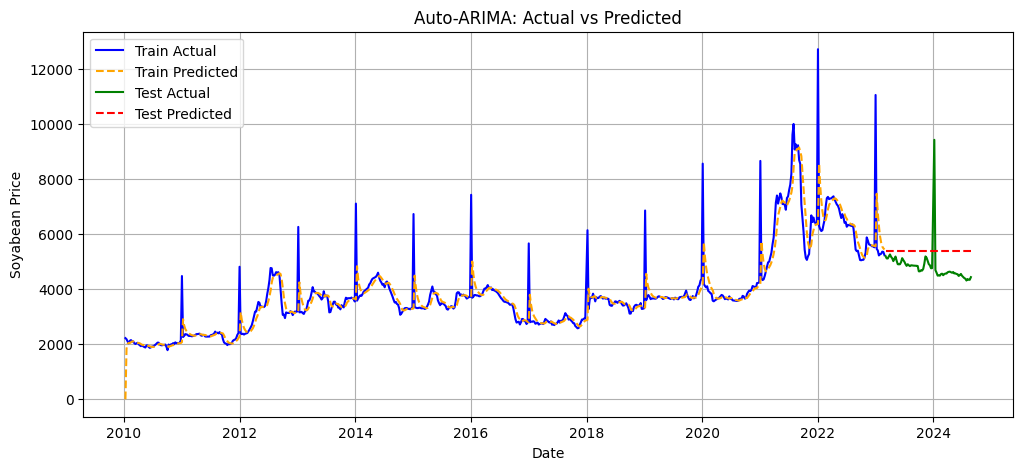

In [10]:

# ======================================================
# 7. Plot actual vs predicted (train + test)
# ======================================================
plt.figure(figsize=(12, 5))
plt.plot(train.index,         train,           label='Train Actual',    color='blue')
plt.plot(train_pred_series.index, train_pred_series, label='Train Predicted', color='orange', linestyle='--')
plt.plot(test.index,          test,            label='Test Actual',     color='green')
plt.plot(test_pred_series.index, test_pred_series,  label='Test Predicted',  color='red', linestyle='--')
plt.title('Auto-ARIMA: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Soyabean Price')
plt.legend()
plt.grid(True)
plt.show()

In [11]:

# ==========================================================
# 8. Compute evaluation metrics: RMSE, MAE, MAPE for both sets
# ==========================================================
def mean_absolute_percentage_error(y_true, y_pred):
    """Compute MAPE, ignoring zeros in the denominator."""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Training metrics
train_rmse = np.sqrt(mean_squared_error(train, train_pred))
train_mae  = mean_absolute_error(train, train_pred)
train_mape = mean_absolute_percentage_error(train, train_pred)

# Testing metrics
test_rmse = np.sqrt(mean_squared_error(test, test_pred))
test_mae  = mean_absolute_error(test, test_pred)
test_mape = mean_absolute_percentage_error(test, test_pred)

print("\nTraining Metrics:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE : {train_mae:.2f}")
print(f"  MAPE: {train_mape:.2f}%")

print("\nTesting Metrics:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE : {test_mae:.2f}")
print(f"  MAPE: {test_mape:.2f}%")



Training Metrics:
  RMSE: 651.27
  MAE : 264.66
  MAPE: 5.82%

Testing Metrics:
  RMSE: 801.15
  MAE : 652.79
  MAPE: 13.49%


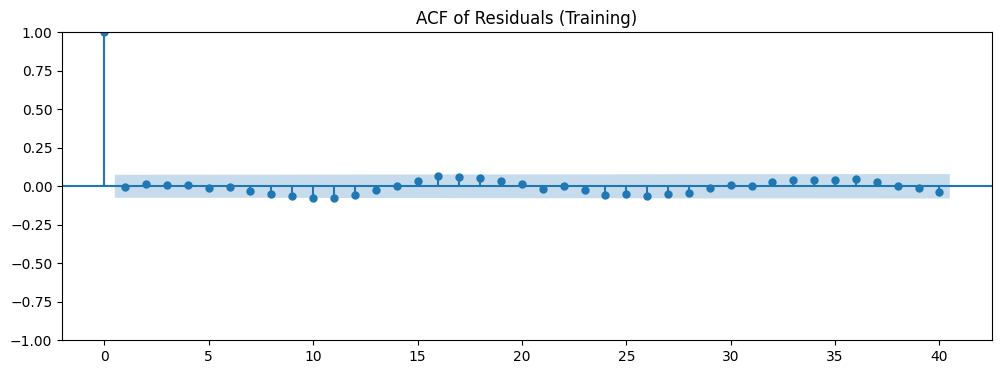


Ljung–Box test (up to lag 10) on Residuals:


,lb_stat,lb_pvalue
10,9.809186,0.457391


In [12]:

# ====================================================
# 9. Residual diagnostics: Check for white-noise
# ====================================================
# Residuals: actual minus fitted (on the training set)
residuals = train - train_pred

# Plot ACF of residuals
plt.figure(figsize=(12, 4))
plot_acf(residuals, ax=plt.gca(), lags=40)
plt.title('ACF of Residuals (Training)')
plt.show()

# Ljung–Box test (e.g., up to lag 10)
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung–Box test (up to lag 10) on Residuals:")
display(lb_test)
